# Week 2 Homework


## Climate Change

Read the dataset into R


In [1]:
library(readr)
library(tidyverse)

climate <- read_csv("~/Documents/Online Classes/analytics-edge/climate_change.csv")

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Parsed with column specification:
cols(
  Year = col_integer(),
  Month = col_integer(),
  MEI = col_double(),
  CO2 = col_double(),
  CH4 = col_double(),
  N2O = col_double(),
  `CFC-11` = col_double(),
  `CFC-12` = col_double(),
  TSI = col_double(),
  Aerosols = col_double(),
  Temp = col_double()
)


Split the data into a training set, consisting of all the observations up to and including 2006, and a testing set consisting of the remaining years.

In [2]:
climate_train <- subset(climate, climate$Year <= 2006)

climate_test <- subset(climate, climate$Year > 2006)

Build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables.

In [3]:
model_train <- lm(Temp ~ MEI + CO2 + CH4 + N2O + `CFC-11` + `CFC-12` + TSI + Aerosols, data = climate_train)
summary(model_train)


Call:
lm(formula = Temp ~ MEI + CO2 + CH4 + N2O + `CFC-11` + `CFC-12` + 
    TSI + Aerosols, data = climate_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25888 -0.05913 -0.00082  0.05649  0.32433 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.246e+02  1.989e+01  -6.265 1.43e-09 ***
MEI          6.421e-02  6.470e-03   9.923  < 2e-16 ***
CO2          6.457e-03  2.285e-03   2.826  0.00505 ** 
CH4          1.240e-04  5.158e-04   0.240  0.81015    
N2O         -1.653e-02  8.565e-03  -1.930  0.05467 .  
`CFC-11`    -6.631e-03  1.626e-03  -4.078 5.96e-05 ***
`CFC-12`     3.808e-03  1.014e-03   3.757  0.00021 ***
TSI          9.314e-02  1.475e-02   6.313 1.10e-09 ***
Aerosols    -1.538e+00  2.133e-01  -7.210 5.41e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09171 on 275 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7436 
F-statistic: 103.6 on 8 and 27

Compute the correlations between all the variables in the training set.

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.00000000,-0.0279419602,-0.0369876842,0.98274939,0.91565945,0.99384523,0.56910643,0.8970116635,0.17030201,-0.34524670,0.78679714
Month,-0.02794196,1.0000000000,0.0008846905,-0.10673246,0.01856866,0.01363153,-0.01311122,0.0006751102,-0.03460619,0.01488954,-0.09985674
MEI,-0.03698768,0.0008846905,1.0000000000,-0.04114717,-0.03341930,-0.05081978,0.06900044,0.0082855443,-0.15449192,0.34023779,0.17247075
CO2,0.98274939,-0.1067324607,-0.0411471651,1.00000000,0.87727963,0.97671982,0.51405975,0.8526896272,0.17742893,-0.35615480,0.78852921
CH4,0.91565945,0.0185686624,-0.0334193014,0.87727963,1.00000000,0.89983864,0.77990402,0.9636162478,0.24552844,-0.26780919,0.70325502
N2O,0.99384523,0.0136315303,-0.0508197755,0.97671982,0.89983864,1.00000000,0.52247732,0.8679307757,0.19975668,-0.33705457,0.77863893
CFC-11,0.56910643,-0.0131112236,0.0690004387,0.51405975,0.77990402,0.52247732,1.00000000,0.8689851828,0.27204596,-0.04392120,0.40771029
CFC-12,0.89701166,0.0006751102,0.0082855443,0.85268963,0.96361625,0.86793078,0.86898518,1.0000000000,0.25530281,-0.22513124,0.68755755
TSI,0.17030201,-0.0346061935,-0.1544919227,0.17742893,0.24552844,0.19975668,0.27204596,0.2553028138,1.00000000,0.05211651,0.24338269
Aerosols,-0.34524670,0.0148895406,0.3402377871,-0.35615480,-0.26780919,-0.33705457,-0.04392120,-0.2251312440,0.05211651,1.00000000,-0.38491375


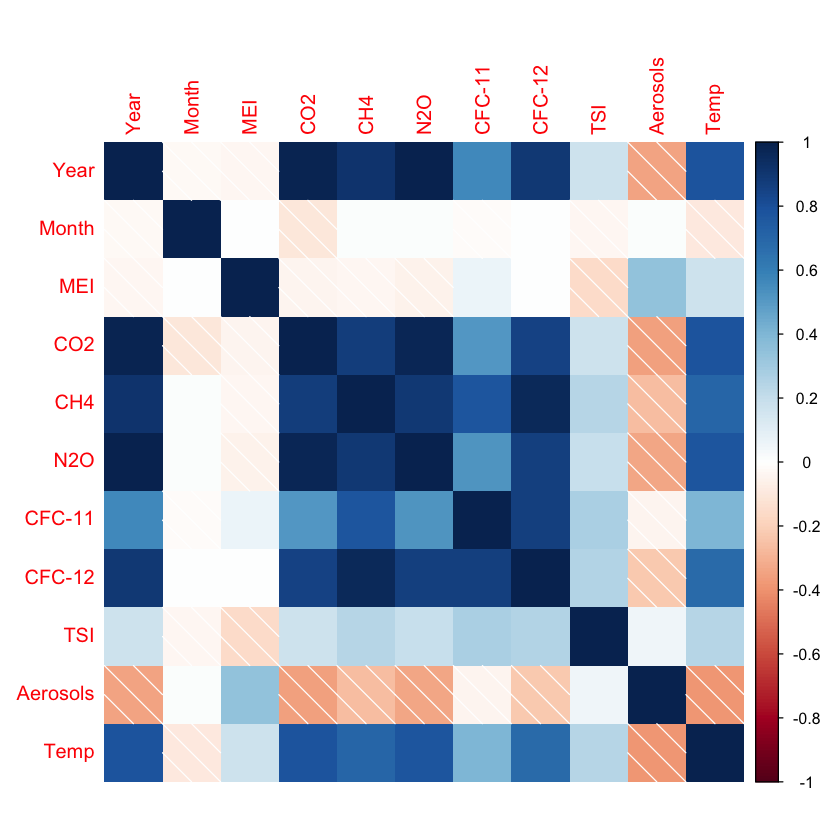

In [4]:
cor(climate_train)

library(corrplot)
corrplot(cor(climate_train), method = "shade")

Focus on the N2O variable and build a model with only MEI, TSI, Aerosols and N2O as independent variables

In [5]:
model_train2 <- lm(Temp ~ MEI + TSI + Aerosols + N2O, data = climate_train)
summary(model_train2)


Call:
lm(formula = Temp ~ MEI + TSI + Aerosols + N2O, data = climate_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27916 -0.05975 -0.00595  0.05672  0.34195 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.162e+02  2.022e+01  -5.747 2.37e-08 ***
MEI          6.419e-02  6.652e-03   9.649  < 2e-16 ***
TSI          7.949e-02  1.487e-02   5.344 1.89e-07 ***
Aerosols    -1.702e+00  2.180e-01  -7.806 1.19e-13 ***
N2O          2.532e-02  1.311e-03  19.307  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09547 on 279 degrees of freedom
Multiple R-squared:  0.7261,	Adjusted R-squared:  0.7222 
F-statistic: 184.9 on 4 and 279 DF,  p-value: < 2.2e-16


The `step` function automagically tries different combinations of independent variables to find a good compromise between model simplicity and $R^2$.

Let's apply the `step` function to our original model that contained _all_ of our variables, `model_train`.

In [6]:
model_step <- step(model_train)
summary(model_step)

Start:  AIC=-1348.16
Temp ~ MEI + CO2 + CH4 + N2O + `CFC-11` + `CFC-12` + TSI + Aerosols

           Df Sum of Sq    RSS     AIC
- CH4       1   0.00049 2.3135 -1350.1
<none>                  2.3130 -1348.2
- N2O       1   0.03132 2.3443 -1346.3
- CO2       1   0.06719 2.3802 -1342.0
- `CFC-12`  1   0.11874 2.4318 -1335.9
- `CFC-11`  1   0.13986 2.4529 -1333.5
- TSI       1   0.33516 2.6482 -1311.7
- Aerosols  1   0.43727 2.7503 -1301.0
- MEI       1   0.82823 3.1412 -1263.2

Step:  AIC=-1350.1
Temp ~ MEI + CO2 + N2O + `CFC-11` + `CFC-12` + TSI + Aerosols

           Df Sum of Sq    RSS     AIC
<none>                  2.3135 -1350.1
- N2O       1   0.03133 2.3448 -1348.3
- CO2       1   0.06672 2.3802 -1344.0
- `CFC-12`  1   0.13023 2.4437 -1336.5
- `CFC-11`  1   0.13938 2.4529 -1335.5
- TSI       1   0.33500 2.6485 -1313.7
- Aerosols  1   0.43987 2.7534 -1302.7
- MEI       1   0.83118 3.1447 -1264.9



Call:
lm(formula = Temp ~ MEI + CO2 + N2O + `CFC-11` + `CFC-12` + TSI + 
    Aerosols, data = climate_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25770 -0.05994 -0.00104  0.05588  0.32203 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.245e+02  1.985e+01  -6.273 1.37e-09 ***
MEI          6.407e-02  6.434e-03   9.958  < 2e-16 ***
CO2          6.402e-03  2.269e-03   2.821 0.005129 ** 
N2O         -1.602e-02  8.287e-03  -1.933 0.054234 .  
`CFC-11`    -6.609e-03  1.621e-03  -4.078 5.95e-05 ***
`CFC-12`     3.868e-03  9.812e-04   3.942 0.000103 ***
TSI          9.312e-02  1.473e-02   6.322 1.04e-09 ***
Aerosols    -1.540e+00  2.126e-01  -7.244 4.36e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09155 on 276 degrees of freedom
Multiple R-squared:  0.7508,	Adjusted R-squared:  0.7445 
F-statistic: 118.8 on 7 and 276 DF,  p-value: < 2.2e-16


Notice how the `step` function has removed one of the independent variables, `CH4`.

Using the model produced from the step function, calculate temperature predictions for the testing data set

In [7]:
predict_climate <- predict(model_step, newdata=climate_test)
predict_climate

1         2         3         4         5         6         7         8 
0.4677808 0.4435404 0.4265541 0.4299162 0.4455113 0.4151422 0.4097367 0.3839390 
        9        10        11        12        13        14        15        16 
0.3255595 0.3274147 0.3231401 0.3316704 0.3522134 0.3313129 0.3142112 0.3703410 
       17        18        19        20        21        22        23        24 
0.4162213 0.4391458 0.4237965 0.3913679 0.3587615 0.3451991 0.3607087 0.3638076

Calculate $R^2$

Recall, 

$$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$\text{RSS} = \displaystyle \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2$$
$$\text{TSS} = \displaystyle \sum_{i = 1}^n (y_i - \bar{y})^2$$

In [8]:
RSS <- sum((climate_test$Temp - predict_climate)^2)
TSS <- sum((climate_test$Temp - mean(climate_train$Temp))^2)
1 - RSS/TSS

[1] 0.6286051



## Reading Test Scores


Load the datasets

In [9]:
library(readr)
pisa <- read_csv("~/Documents/Online Classes/analytics-edge/pisa2009train.csv")
pisa_test <- read_csv("~/Documents/Online Classes/analytics-edge/pisa2009test.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  raceeth = col_character(),
  readingScore = col_double()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_integer(),
  raceeth = col_character(),
  readingScore = col_double()
)
See spec(...) for full column specifications.


How many students are there in the training set?

In [10]:
nrow(pisa)

[1] 3663

What is the average reading test score of males? females

In [11]:
tapply(pisa$readingScore, pisa$male, mean)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: 

0        1 
512.9406 483.5325

Which variables are missing data in at least one observation in the training set?

In [12]:
summary(pisa)

     grade            male          raceeth            preschool     
 Min.   : 8.00   Min.   :0.0000   Length:3663        Min.   :0.0000  
 1st Qu.:10.00   1st Qu.:0.0000   Class :character   1st Qu.:0.0000  
 Median :10.00   Median :1.0000   Mode  :character   Median :1.0000  
 Mean   :10.09   Mean   :0.5111                      Mean   :0.7228  
 3rd Qu.:10.00   3rd Qu.:1.0000                      3rd Qu.:1.0000  
 Max.   :12.00   Max.   :1.0000                      Max.   :1.0000  
                                                     NA's   :56      
 expectBachelors     motherHS    motherBachelors    motherWork    
 Min.   :0.0000   Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:1.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.00   Median :0.0000   Median :1.0000  
 Mean   :0.7859   Mean   :0.88   Mean   :0.3481   Mean   :0.7345  
 3rd Qu.:1.0000   3rd Qu.:1.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00   Max. 

Remove the 'NA' values from the training and test datasets.

In [13]:
pisa <- na.omit(pisa)

pisa_test <- na.omit(pisa_test)

How many observations are now in the training set? test set?

In [14]:
nrow(pisa)
nrow(pisa_test)

[1] 2414

[1] 990

The problem assumed that when reading the .csv file, it had set the `raceeth` elements as factors, but when I checked with `glimpse`, it had them listed as character variables. So, I'll first convert `raceeth` to factors. Then for the purposes of conducting our linear regression we need to we define one level as the "reference level" and add a binary variable for each of the remaining levels. Typically, the most common occuring variable is chosen as the "reference level," which in this case is 'White.' In this way, a factor with n levels is replaced by n-1 binary variables. 

The question illustrates how binary values are used to help with all of this:
"As an example, consider the unordered factor variable "color", with levels "red", "green", and "blue". If "green" were the reference level, then we would add binary variables "colorred" and "colorblue" to a linear regression problem. All red examples would have colorred=1 and colorblue=0. All blue examples would have colorred=0 and colorblue=1. All green examples would have colorred=0 and colorblue=0."

In [15]:
pisa$raceeth <- as.factor(pisa$raceeth)
pisa_test$raceeth <- as.factor(pisa_test$raceeth)

pisa$raceeth = relevel(pisa$raceeth, "White")
pisa_test$raceeth = relevel(pisa_test$raceeth, "White")

Build a linear regression model (call it lmScore) using the training set to predict readingScore using all the remaining variables

In [16]:
lmScore <- lm(readingScore ~., data=pisa)
summary(lmScore)


Call:
lm(formula = readingScore ~ ., data = pisa)

Residuals:
    Min      1Q  Median      3Q     Max 
-247.44  -48.86    1.86   49.77  217.18 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   143.766333  33.841226   4.248
grade                                          29.542707   2.937399  10.057
male                                          -14.521653   3.155926  -4.601
raceethAmerican Indian/Alaska Native          -67.277327  16.786935  -4.008
raceethAsian                                   -4.110325   9.220071  -0.446
raceethBlack                                  -67.012347   5.460883 -12.271
raceethHispanic                               -38.975486   5.177743  -7.528
raceethMore than one race                     -16.922522   8.496268  -1.992
raceethNative Hawaiian/Other Pacific Islander  -5.101601  17.005696  -0.300
preschool                                      -4.463670   3.486055  -1.280
expe

What is the training-set root-mean squared error (RMSE) of lmScore?

Recall,

$$RMSE = \sqrt{\frac{RSS}{N}} = \sqrt{\frac{1}{N}\sum_{i = 1}^{n}(y_i - \hat{y}_i)^2}$$

In [17]:
RSS <- sum(lmScore$residuals^2)
RMSE <- sqrt(RSS/nrow(pisa))
RMSE

[1] 73.36555

Use the lmScore model to predict the reading scores of students in the test set.

In [18]:
predTest <- predict(lmScore, newdata = pisa_test)

What is the range between the maximum and minimum predicted reading score on the test set?

In [19]:
summary(predTest)
max(predTest) - min(predTest)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  353.2   482.0   524.0   516.7   555.7   637.7 

[1] 284.4683

In [20]:
RSS <- sum((pisa_test$readingScore - predTest)^2)
RMSE <- sqrt(RSS/nrow(pisa_test))
RSS
RMSE

[1] 5762082

[1] 76.29079

What is the predicted test score used in the "baseline model"?

In [21]:
mean(pisa$readingScore)

[1] 517.9629

What is the RSS of the "baseline model" on the testing set?

In [22]:
# This is the same thing as asking what is the TSS

TSS_base <- sum((pisa_test$readingScore-mean(pisa$readingScore))^2)
TSS_base

[1] 7802354

What is the test-set R-squared value of lmScore?

In [23]:
RSS <- sum((pisa_test$readingScore - predTest)^2)
TSS_base <- sum((pisa_test$readingScore-mean(pisa$readingScore))^2)
1 - RSS/TSS_base

[1] 0.2614944

# Detecting Flu Epidemics via Search Engine Query Data

Load the data

In [24]:
FluTrain <- read_csv("~/Documents/Online Classes/analytics-edge/FluTrain.csv")
FluTest <- read_csv("~/Documents/Online Classes/analytics-edge/FluTest.csv")

Parsed with column specification:
cols(
  Week = col_character(),
  ILI = col_double(),
  Queries = col_double()
)
Parsed with column specification:
cols(
  Week = col_character(),
  ILI = col_double(),
  Queries = col_double()
)


Looking at the time period 2004-2011, which week corresponds to the highest percentage of ILI-related physician visits?

In [25]:
glimpse(FluTrain)
which.max(FluTrain$ILI)
FluTrain$Week[303]

Observations: 417
Variables: 3
$ Week    <chr> "2004-01-04 - 2004-01-10", "2004-01-11 - 2004-01-17", "2004...
$ ILI     <dbl> 2.4183312, 1.8090560, 1.7120239, 1.5424951, 1.4378683, 1.32...
$ Queries <dbl> 0.23771580, 0.22045153, 0.22576361, 0.23771580, 0.22443559,...


[1] 303

[1] "2009-10-18 - 2009-10-24"

Plot the histogram of the dependent variable, ILI. What best describes the distribution of values of ILI?

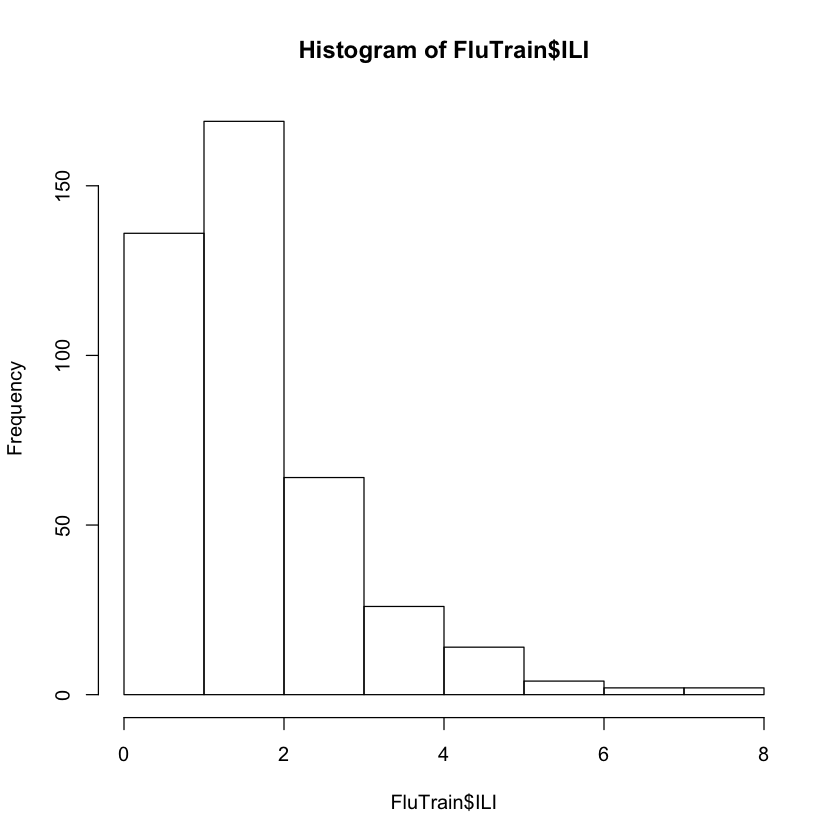

In [26]:
hist(FluTrain$ILI)

Plot the natural logarithm of ILI versus Queries. What does the plot suggest?

We know from looking at the histogram that the ILI values are skewed to the right. Given this skewing of the data, it may be preferable to use `log` of ILI to keep the few large or small values from having an undue influence on the RSS of predictive models. Appreciate the difference in both plots

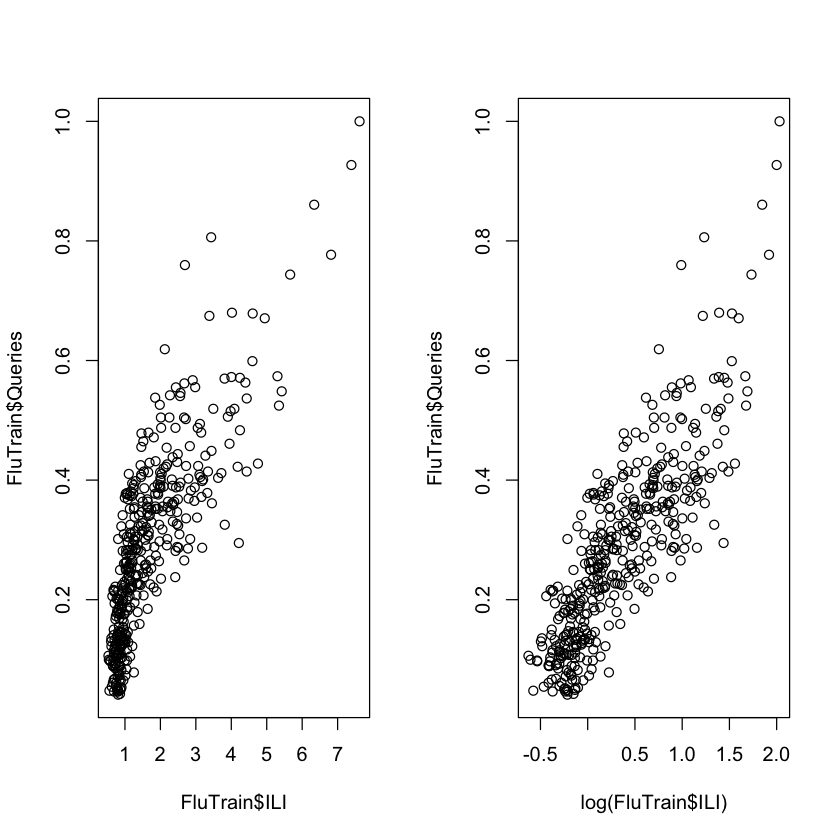

In [27]:
par(mfrow=c(1,2))
plot(FluTrain$ILI, FluTrain$Queries) 
plot(log(FluTrain$ILI), FluTrain$Queries) # with the log of ILI

par(mfrow=c(1,1)) #reset it

Create a regression model to predict log(ILI) based on Queries.

What is the training set R-squared value?

In [28]:
FluTrend1 <- lm(log(ILI) ~ Queries, data = FluTrain)
summary(FluTrend1)


Call:
lm(formula = log(ILI) ~ Queries, data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


What is our estimate for the percentage of ILI-related physician visits for the week of March 11, 2012?

We will _not_ use `PredTest1 = predict(FluTrend1, newdata=FluTest)` because we are trying to predict `ILI` rather than `log(ILI)`, which was used to generate our model. Instead we will have to use `exp` to calculate the compute the exponential value in order to get the desired output in `ILI`.

In [29]:
PredTest1 = exp(predict(FluTrend1, newdata=FluTest))

FluTest$Week # shows that 2012-03-11 is index 11
FluTest$Week[11] # to confirm
PredTest1[11] # gives estimate of % of ILI-related doc visits

[1] "2012-01-01 - 2012-01-07" "2012-01-08 - 2012-01-14"
 [3] "2012-01-15 - 2012-01-21" "2012-01-22 - 2012-01-28"
 [5] "2012-01-29 - 2012-02-04" "2012-02-05 - 2012-02-11"
 [7] "2012-02-12 - 2012-02-18" "2012-02-19 - 2012-02-25"
 [9] "2012-02-26 - 2012-03-03" "2012-03-04 - 2012-03-10"
[11] "2012-03-11 - 2012-03-17" "2012-03-18 - 2012-03-24"
[13] "2012-03-25 - 2012-03-31" "2012-04-01 - 2012-04-07"
[15] "2012-04-08 - 2012-04-14" "2012-04-15 - 2012-04-21"
[17] "2012-04-22 - 2012-04-28" "2012-04-29 - 2012-05-05"
[19] "2012-05-06 - 2012-05-12" "2012-05-13 - 2012-05-19"
[21] "2012-05-20 - 2012-05-26" "2012-05-27 - 2012-06-02"
[23] "2012-06-03 - 2012-06-09" "2012-06-10 - 2012-06-16"
[25] "2012-06-17 - 2012-06-23" "2012-06-24 - 2012-06-30"
[27] "2012-07-01 - 2012-07-07" "2012-07-08 - 2012-07-14"
[29] "2012-07-15 - 2012-07-21" "2012-07-22 - 2012-07-28"
[31] "2012-07-29 - 2012-08-04" "2012-08-05 - 2012-08-11"
[33] "2012-08-12 - 2012-08-18" "2012-08-19 - 2012-08-25"
[35] "2012-08-26 - 2012-09-01" "2012-09-02 - 2012-09-08"
[37] "2012-09-09 - 2012-09-15" "2012-09-16 - 2012-09-22"
[39] "2012-09-23 - 2012-09-29" "2012-09-30 - 2012-10-06"
[41] "2012-10-07 - 2012-10-13" "2012-10-14 - 2012-10-20"
[43] "2012-10-21 - 2012-10-27" "2012-10-28 - 2012-11-03"
[45] "2012-11-04 - 2012-11-10" "2012-11-11 - 2012-11-17"
[47] "2012-11-18 - 2012-11-24" "2012-11-25 - 2012-12-01"
[49] "2012-12-02 - 2012-12-08" "2012-12-09 - 2012-12-15"
[51] "2012-12-16 - 2012-12-22" "2012-12-23 - 2012-12-29"

[1] "2012-03-11 - 2012-03-17"

11 
2.187378

What is the relative error betweeen the estimate (our prediction) and the observed value for the week of March 11, 2012?

Relative Error = (Observed ILI - Estimated ILI)/Observed ILI

In [30]:
(FluTest$ILI[11] - PredTest1[11])/FluTest$ILI[11]

11 
0.04623827

What is the Root Mean Square Error (RMSE) between our estimates and the actual observations for the percentage of ILI-related physician visits, on the test set?

In [31]:
RSS <- sum((PredTest1 - FluTest$ILI)^2)
RMSE <- sqrt(RSS/nrow(FluTest))
RSS
RMSE

[1] 29.17708

[1] 0.7490645

Build a variable called `ILILag2` that contains the `ILI` value from 2 weeks before the current observation. Why? Because the `ILI` variable is reported with a 1- or 2-week lag we cannot rely on the previous week's ILI value to predict the current week's value.

Since we are dealing with Time-Series data, let's use the `zoo` package.

How many values are missing in the new ILILag2 variable?

In [32]:
library(zoo)
ILILag2 = stats::lag(zoo(FluTrain$ILI), -2, na.pad = TRUE) #use stats:: b/c dplyr has a conflicting funxn
FluTrain$ILILag2 = coredata(ILILag2) # adds the ILILag2 data to the training set

sum(is.na(ILILag2))


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



[1] 2

Plot the log of ILILag2 against the log of ILI.

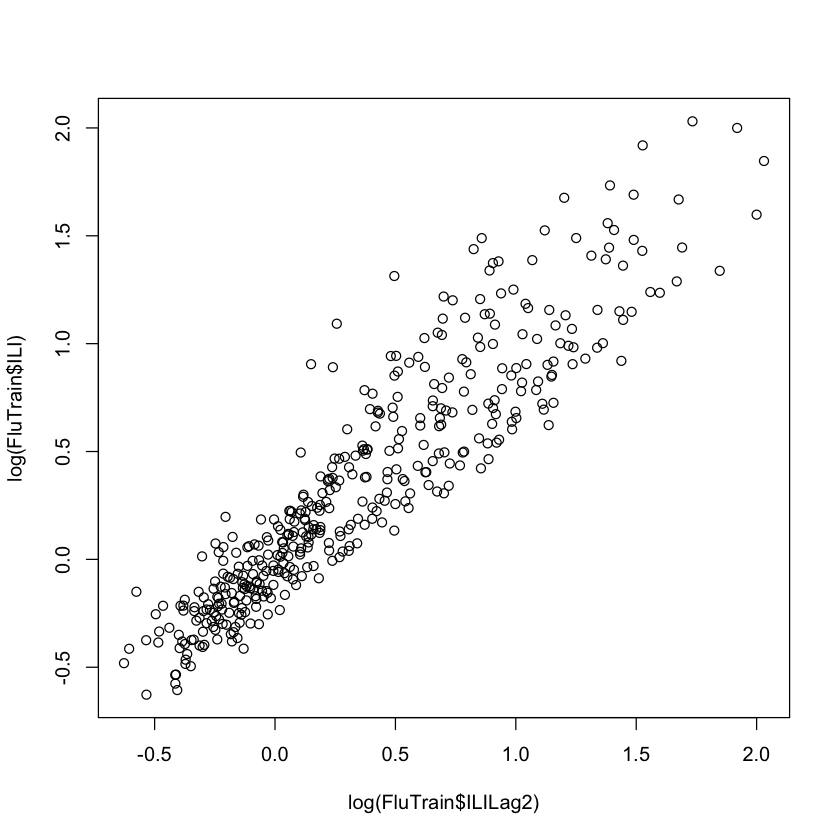

In [33]:
plot(log(FluTrain$ILILag2), log(FluTrain$ILI))

Train a linear regression model on the FluTrain dataset to predict the log of the ILI variable using the Queries variable as well as the log of the ILILag2 variable.

Which coefficients are significant at the p=0.05 level?

In [34]:
FluTrend2 <- lm(log(ILI) ~ Queries + log(ILILag2), data = FluTrain)
summary(FluTrend2)


Call:
lm(formula = log(ILI) ~ Queries + log(ILILag2), data = FluTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52209 -0.11082 -0.01819  0.08143  0.76785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.24064    0.01953  -12.32   <2e-16 ***
Queries       1.25578    0.07910   15.88   <2e-16 ***
log(ILILag2)  0.65569    0.02251   29.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1703 on 412 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9059 
F-statistic:  1993 on 2 and 412 DF,  p-value: < 2.2e-16


Add an ILILag2 variable to the FluTest data frame. How many missing values are there in this new variable?

In [35]:
ILILag2 = stats::lag(zoo(FluTest$ILI), -2, na.pad = TRUE)
FluTest$ILILag2 = coredata(ILILag2)

sum(is.na(ILILag2))

[1] 2

Obtain test set predictions of the ILI variable from the FluTrend2 model.

What is the test-set RMSE of the FluTrend2 model?

In [36]:
predictTest2 <- exp(predict(FluTrend2, newdata = FluTest))

RSS <- sum((predictTest2 - FluTest$ILI)^2)
RMSE <- sqrt(RSS/nrow(FluTest))
RMSE

[1] NA